##Worked Examples:

###Forecasting Future Sales using ARIMA and SARIMAX models

I have taken data of "perrin-freres-monthly-champagne" which is mostly about the monthly sales of champagne


## What is Time-series

A time series is a series of data points indexed (or listed or graphed) in time order. Most commonly, a time series is a sequence taken at successive equally spaced points in time. Thus it is a sequence of discrete-time data. For example, stock prices over a fixed period of time, hotel bookings, ecommerce sales, waether cycle reports etc.

* Time series analysis comprises methods for analyzing time series data in order to extract meaningful statistics and other characteristics of the data. Time series forecasting is the use of a model to predict future values based on previously observed values.

### **Components of a Time Series:**

**1) Trend:** pattern in data that shows the movement of a series to relatively higher or lower values over a long period of time.


A trend could be :

**UPTREND:** Time Series Analysis shows a general pattern that is upward then it is Uptrend.

**DOWNTREND:** Time Series Analysis shows a pattern that is downward then it is Downtrend.

**HORIZONTAL TREND:** If no pattern observed then it is called a Horizontal or stationary trend.


**2) Seasonality:** Predictable pattern that recurs or repeats over regular intervals. Seasonality is often observed within a year or less.


**Models used for Analysis are-**

**ARIMA model:**


* Autoregressive Integrated Moving Average, or ARIMA, is a forecasting method for univariate time series data.

* As its name suggests, it supports both an autoregressive and moving average elements. The integrated element refers to differencing allowing the method to support time series data with a trend.

* A problem with ARIMA is that it does not support seasonal data. That is a time series with a repeating cycle.

* ARIMA expects data that is either not seasonal or has the seasonal component removed, e.g. seasonally adjusted via methods such as seasonal differencing.


**The general process for ARIMA models is the following:**

* Visualize the Time Series Data

* Make the time series data stationary

* Plot the Correlation and AutoCorrelation Charts

* Construct the ARIMA Model or Seasonal ARIMA based on the data

* Use the model to make predictions


**SARIMA model:**

* Seasonal Autoregressive Integrated Moving Average, SARIMA or Seasonal ARIMA, is an extension of ARIMA that explicitly supports univariate time series data with a seasonal component.

* It adds three new hyperparameters to specify the autoregression (AR), differencing (I) and moving average (MA) for the seasonal component of the series, as well as an additional parameter for the period of the seasonality.

* A seasonal ARIMA model is formed by including additional seasonal terms in the ARIMA.

* The seasonal part of the model consists of terms that are very similar to the non-seasonal components of the model, but they involve backshifts of the seasonal period.




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from io import IncrementalNewlineDecoder
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib Inline



In [ ]:
df = pd.read_csv('perrin-freres-monthly-champagne-.csv')
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [ ]:
df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [ ]:
# changing the column names

df.columns=["Month", "Sales"]
df.head()


,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [ ]:
#droping the recording which are having NaN values
df.drop(106,axis=0,inplace=True)
df.tail()

,Month,Sales
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


* From the table data we can see that the month column is in format of "string", I want to change the datatype of this column to the "datetime". It will helpful when analysing the data with ARIMA model


In [ ]:
#convert the month into datetime
df['Month']=pd.to_datetime(df['Month'])

In [ ]:
df.head()

,Month,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [ ]:
df.set_index('Month', inplace=True)

In [ ]:
df.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [ ]:
df.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


###Visualize the data

<Axes: xlabel='Month'>

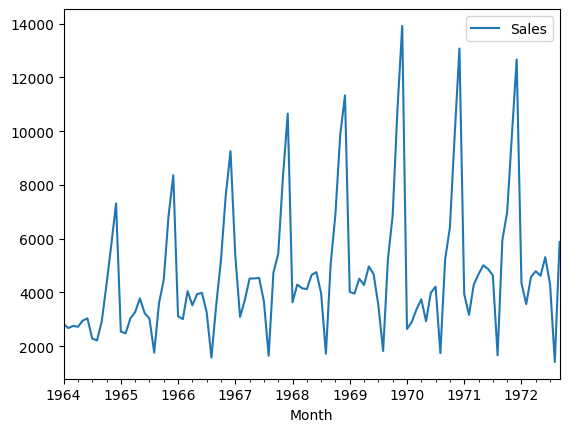

In [ ]:
df.plot()

* From the look of the data we can say that the trend is kindof following seasonal pattern.

In [ ]:
### testing for stationarity, we taking dicky-fuller test
from statsmodels.tsa.stattools import adfuller

* "adfuller" test basically gives us 5 values i.e, ADF Test Statistic, p-value, #Lags used, #Number of the observations used

In [ ]:
test_result=adfuller(df['Sales'])

In [ ]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")


In [ ]:
adfuller_test(df['Sales'])

ADF Test Statistic : -1.8335930563276215
p-value : 0.36391577166024586
#Lags Used : 11
Number of Observations Used : 93
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


* Since p-value in tis case is 0.363 we can say that the data is non-stationary as the p-value > 0.05


* Since the data is non-stationary, we have to make it stationary to perform the time-series analysis methods. Below are few steps made to implement these changes



###Differencing

Here, we shift one position of particular data and that value id asssigned as NaN to get the difference of the two points.

In [ ]:
df['Sales First Difference'] = df['Sales'] - df['Sales'].shift(1)

In [ ]:
df['Sales'].shift(1)

Month
1964-01-01       NaN
1964-02-01    2815.0
1964-03-01    2672.0
1964-04-01    2755.0
1964-05-01    2721.0
               ...  
1972-05-01    4788.0
1972-06-01    4618.0
1972-07-01    5312.0
1972-08-01    4298.0
1972-09-01    1413.0
Name: Sales, Length: 105, dtype: float64

As my data is seasonal in trend, I have to make a seasonal diffrence by shifting by 12.

In [ ]:
df['Seasonal First Difference'] = df['Sales']-df['Sales'].shift(12)

In [ ]:
df.head(14)

,Sales,Sales First Difference,Seasonal First Difference
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN
1964-06-01,3036.0,90.0,NaN
1964-07-01,2282.0,-754.0,NaN
1964-08-01,2212.0,-70.0,NaN
1964-09-01,2922.0,710.0,NaN


In [ ]:
#Performing dicky-fuller test on the above seasonal shift data

adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -7.626619157213166
p-value : 2.0605796968136632e-11
#Lags Used : 0
Number of Observations Used : 92
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


From the above obtained p-value we can say that it is less than 0.05, therefore we can say that the data is stationary

<Axes: xlabel='Month'>

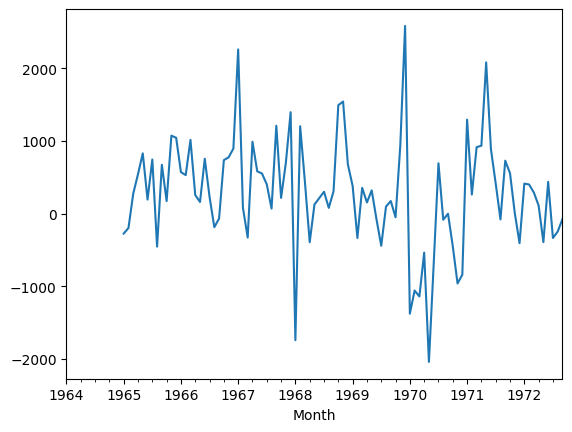

In [ ]:
df['Seasonal First Difference'].plot()

###Auto Regressive Model

This model helps in explaining how many previous day data are required to consider

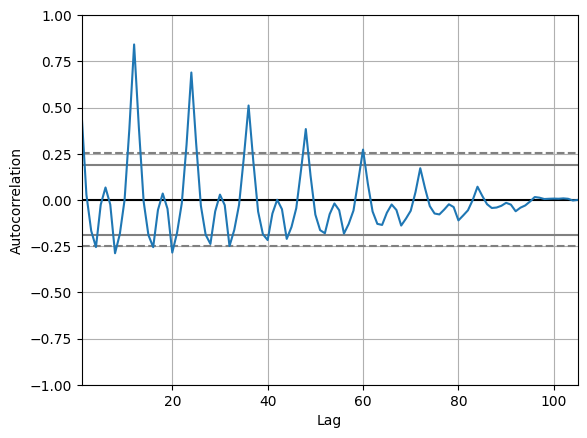

In [ ]:
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt

autocorrelation_plot(df['Sales'])
plt.show()


##How do you select particular model to analyzie

* Identification of an AR model is often best done with the PACF.

* For an AR model, the theoretical PACF “shuts off” past the order of the model. The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point. Put another way, the number of non-zero partial autocorrelations gives the order of the AR model. By the “order of the model” we mean the most extreme lag of x that is used as a predictor.

* Identification of an MA model is often best done with the ACF rather than the PACF.

* For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner. A clearer pattern for an MA model is in the ACF. The ACF will have non-zero autocorrelations only at lags involved in the model.


belwo are the components given in ARIMA model:



p actually specifies - AR model lags

d - differencing

q - moving average lags

ARIMA has 3 components - auto-regressive, integrated, moving average.

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

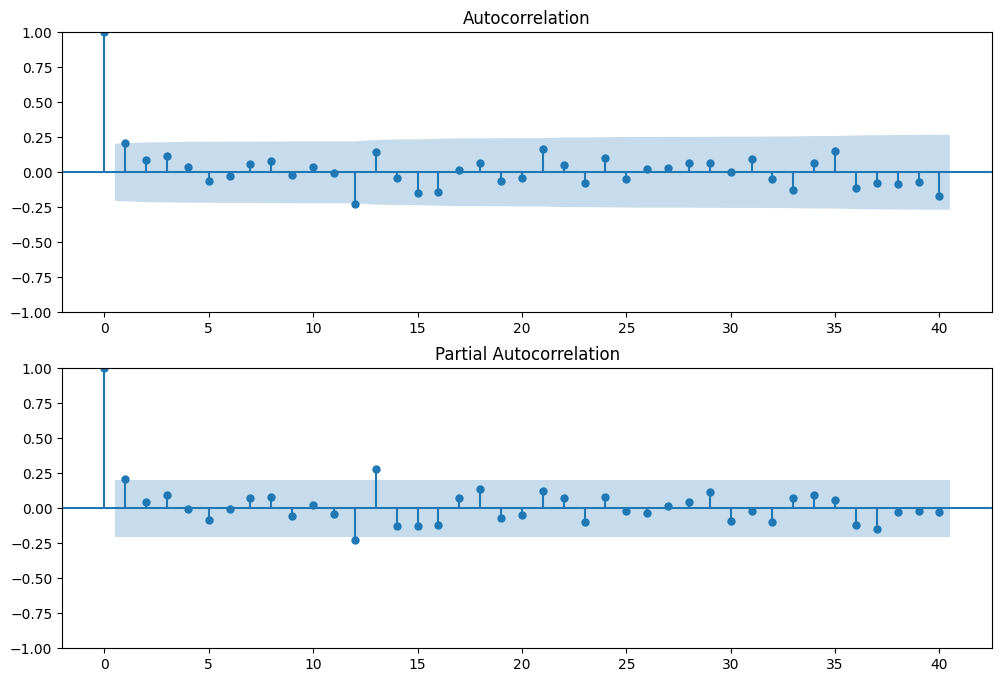

In [ ]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:], lags=40, ax=ax2)
plt.show()


In [ ]:
# For non-seasonal data
#p=1, d=1, q=0 or 1

from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df['Sales'], order=(1, 1, 1))
model_fit = model.fit()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  105
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -952.814
Date:                Mon, 29 Jan 2024   AIC                           1911.627
Time:                        18:05:28   BIC                           1919.560
Sample:                    01-01-1964   HQIC                          1914.841
                         - 09-01-1972                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4545      0.114      4.001      0.000       0.232       0.677
ma.L1         -0.9667      0.056    -17.329      0.000      -1.076      -0.857
sigma2      5.226e+06   6.17e+05      8.472      0.000    4.02e+06    6.44e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.91   Jarque-Bera (JB):                 2.59
Prob(Q):                              0.34   Prob(JB):                         0.27
Heteroskedasticity (H):               3.40   Skew:                             0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='Month'>

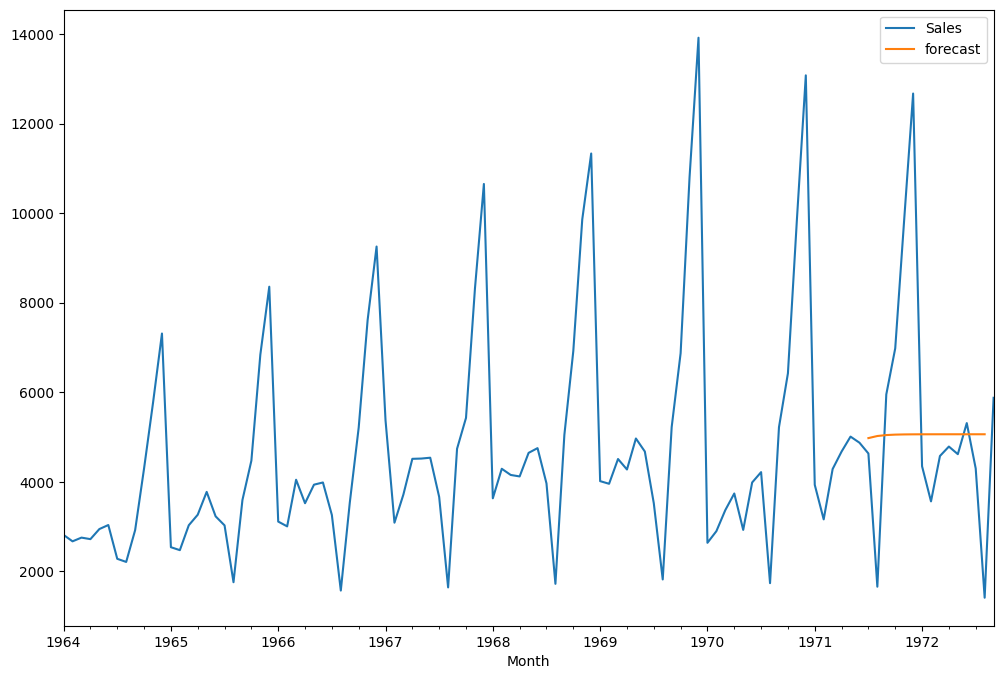

In [ ]:
df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [ ]:
import statsmodels.api as sm

In [ ]:
#for seasonal shift

model=sm.tsa.statespace.SARIMAX(df['Sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<Axes: xlabel='Month'>

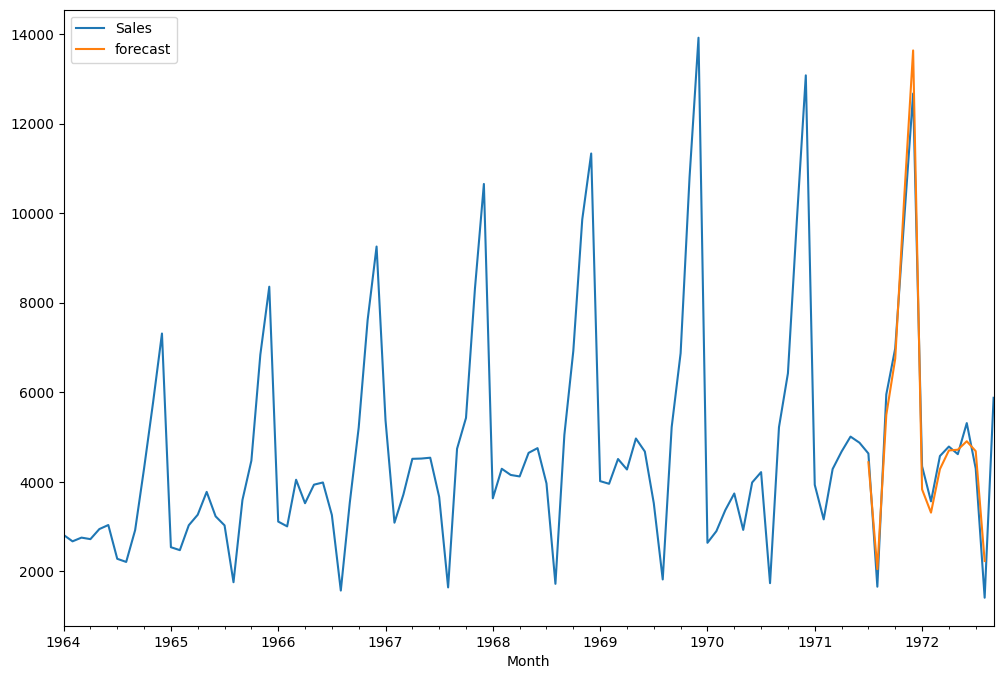

In [ ]:
df['forecast']=results.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [ ]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [ ]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [ ]:
future_datest_df.tail()

,Sales,Sales First Difference,Seasonal First Difference,forecast
1974-04-01,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN,NaN


In [ ]:
future_df=pd.concat([df,future_datest_df])

<Axes: >

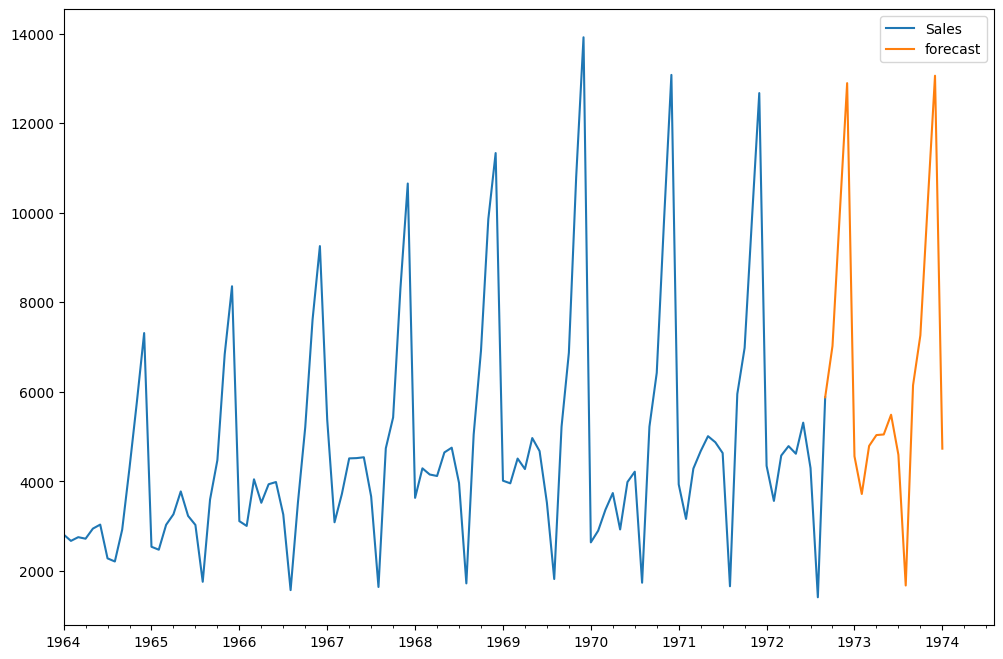

In [ ]:
future_df['forecast'] = results.predict(start = 104, end = 120, dynamic= True)
future_df[['Sales', 'forecast']].plot(figsize=(12, 8))

* Hence, From the above plottings we can say it is good model as the forecasted sales graph is following that of the actual graph. we have predicted the Sales for the next two years successfully.



### **Example2: Below is the example of the analysis of the Trade market share over teo decades**

I have used LSTM neural networks to analysis the trend of the market.

LSTM - long-short term Memory method

It is a type of recurrent neural network (RNN) architecture used in the field of deep learning. LSTMs are particularly known for their effectiveness in handling sequences of data, making them suitable for applications such as natural language processing, speech recognition, and time series analysis.

In [ ]:
import pandas as pd
df = pd.read_csv('MSFT.csv')

In [ ]:
#display the data from dataframe
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.060274,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062427,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063504,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.061889,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060812,47894400
...,...,...,...,...,...,...,...
9540,2024-01-22,400.019989,400.619995,393.589996,396.510010,396.510010,27016900
9541,2024-01-23,395.750000,399.380005,393.929993,398.899994,398.899994,20525900
9542,2024-01-24,401.540009,405.630005,400.450012,402.559998,402.559998,24867000
9543,2024-01-25,404.320007,407.010010,402.529999,404.869995,404.869995,21021200


* From the dataset we can observe the data of the stock such as - opened value, its highest, lowest, closing, adjusted closing value of the stock and the volume of the stocks traded that day.

In [ ]:
#here I'm just taking the Date and Close cloumn to keep the analysis simple.
#As in Date the stock is available and the closing value of that stock on that particular day.

df = df[['Date', 'Close']]
df

df['Date']


0       1986-03-13
1       1986-03-14
2       1986-03-17
3       1986-03-18
4       1986-03-19
           ...    
9540    2024-01-22
9541    2024-01-23
9542    2024-01-24
9543    2024-01-25
9544    2024-01-26
Name: Date, Length: 9545, dtype: object

In [ ]:
#to convert the Datatype of "Date" from Object to "Date"

import datetime
def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)
datetime_object = str_to_datetime('1986-03-19')
datetime_object

datetime.datetime(1986, 3, 19, 0, 0)

* Applying above conversion to all the Date string Objects to convert them into "Date" object

In [ ]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

<ipython-input-31-f6fc52bb0fa5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


0      1986-03-13
1      1986-03-14
2      1986-03-17
3      1986-03-18
4      1986-03-19
          ...    
9540   2024-01-22
9541   2024-01-23
9542   2024-01-24
9543   2024-01-25
9544   2024-01-26
Name: Date, Length: 9545, dtype: datetime64[ns]

* We can see that the datatype is being converted into "datetime64" object

In [ ]:
df.index = df.pop('Date')
df

,Close
Date,
1986-03-13,0.097222
1986-03-14,0.100694
1986-03-17,0.102431
1986-03-18,0.099826
1986-03-19,0.098090
...,...
2024-01-22,396.510010
2024-01-23,398.899994
2024-01-24,402.559998


###Ploting data using matplotlib

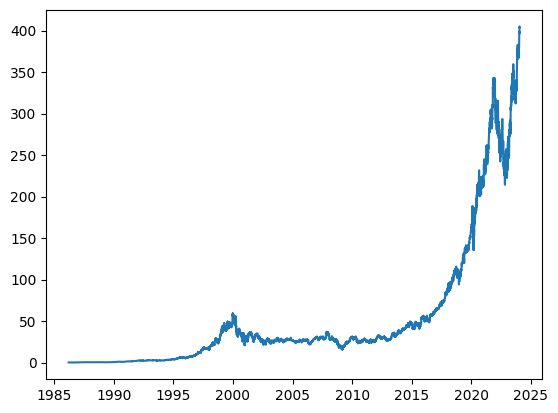

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

* we can see that there is an increasing curve from early 1980s till 2016 with a drop later on 2021


* Since we are using LSTM model to identify the trend. we need to convert this into supervised learning model

In [ ]:
import pandas as pd
import numpy as np
import datetime

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
    # Convert string dates to datetime
    first_date = pd.to_datetime(first_date_str)
    last_date = pd.to_datetime(last_date_str)

    # Ensure the dataframe index is datetime
    dataframe.index = pd.to_datetime(dataframe.index)

    # Lists to store the results
    dates = []
    X, Y = [], []

    target_date = first_date

    while target_date <= last_date:
        # Get the subset of dataframe up to the target date
        df_subset = dataframe[dataframe.index <= target_date].tail(n + 1)

        # Check if the subset is smaller than the window size
        if len(df_subset) < n + 1:
            print(f'Error: Window of size {n} is too large for date {target_date}')
            break

        # Extract the 'Close' values and split them into X (inputs) and Y (target)
        values = df_subset['Close'].values
        x, y = values[:-1], values[-1]

        dates.append(target_date)
        X.append(x)
        Y.append(y)

        # Increment the target date by 1 day
        target_date += datetime.timedelta(days=1)

    # Create the final DataFrame
    ret_df = pd.DataFrame({'Target Date': dates})
    for i in range(n):
        ret_df[f'Target-{n - i}'] = [x[i] for x in X]
    ret_df['Target'] = Y

    return ret_df



# Usage example with your actual dataframe 'df'
windowed_df = df_to_windowed_df(df, '2021-03-25', '2022-03-23', n=3)
print(windowed_df.head())


  Target Date    Target-3    Target-2    Target-1      Target
0  2021-03-25  235.990005  237.580002  235.460007  232.339996
1  2021-03-26  237.580002  235.460007  232.339996  236.479996
2  2021-03-27  237.580002  235.460007  232.339996  236.479996
3  2021-03-28  237.580002  235.460007  232.339996  236.479996
4  2021-03-29  235.460007  232.339996  236.479996  235.240005


* Here Target-3, Target-2, Target-1 represents the three previous 3 day values from that particular date whereas Target is the actual value on that year.

In this way, we can say that we have converted the model into supervised model with target date and its target value along with there input values i.e, Target-1, Target-2, Target-3

In [ ]:
#To convert the above data into numpy array
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]

  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1],1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((364,), (364, 3, 1), (364,))

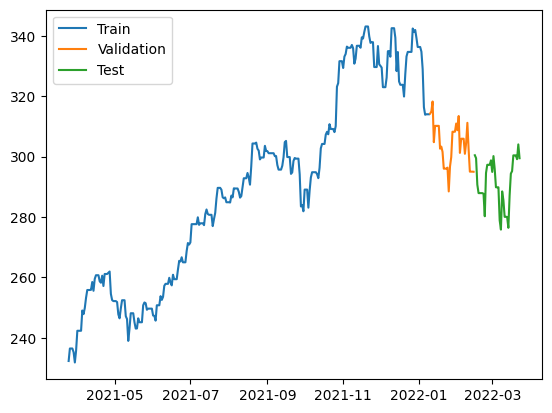

In [ ]:
#Splitting the data into train, test, validation partition

q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]
dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation = 'relu'),
                    layers.Dense(32, activation = 'relu'),
                    layers.Dense(1)])

model.compile(loss='mse', optimizer = Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)



Epoch 1/100
10/10 [==============================] - 4s 125ms/step - loss: 84825.6406 - mean_absolute_error: 289.4962 - val_loss: 92193.5312 - val_mean_absolute_error: 303.5528
Epoch 2/100
10/10 [==============================] - 0s 7ms/step - loss: 84445.5156 - mean_absolute_error: 288.8413 - val_loss: 91856.4219 - val_mean_absolute_error: 302.9970
Epoch 3/100
10/10 [==============================] - 0s 8ms/step - loss: 84097.7891 - mean_absolute_error: 288.2378 - val_loss: 91430.8750 - val_mean_absolute_error: 302.2939
Epoch 4/100
10/10 [==============================] - 0s 8ms/step - loss: 83609.5781 - mean_absolute_error: 287.3918 - val_loss: 90756.1953 - val_mean_absolute_error: 301.1760
Epoch 5/100
10/10 [==============================] - 0s 9ms/step - loss: 82852.6562 - mean_absolute_error: 286.0662 - val_loss: 89772.9844 - val_mean_absolute_error: 299.5393
Epoch 6/100
10/10 [==============================] - 0s 10ms/step - loss: 81756.4531 - mean_absolute_error: 284.1405 - val_

10/10 [==============================] - 0s 3ms/step


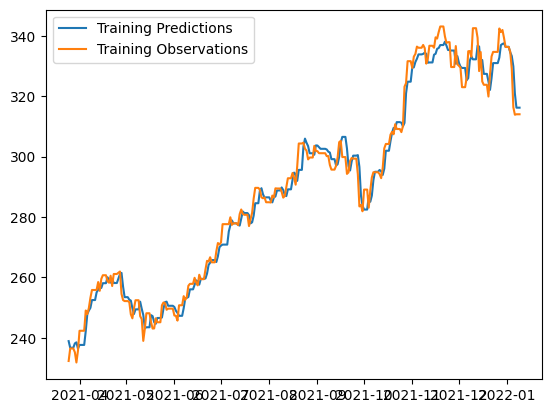

In [ ]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])


2/2 [==============================] - 0s 6ms/step


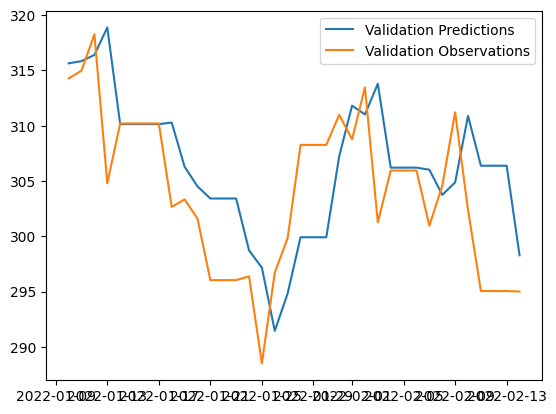

In [ ]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])


2/2 [==============================] - 0s 6ms/step


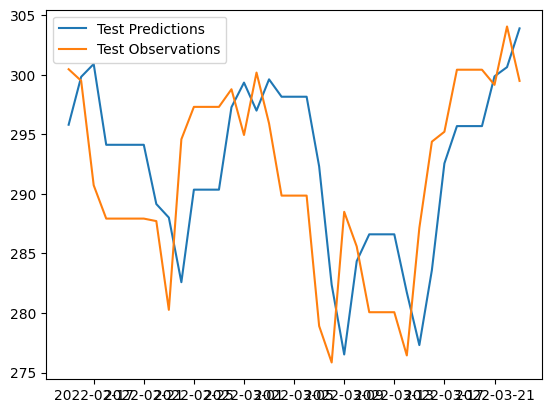

In [ ]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Test Predictions', 'Test Observations'])


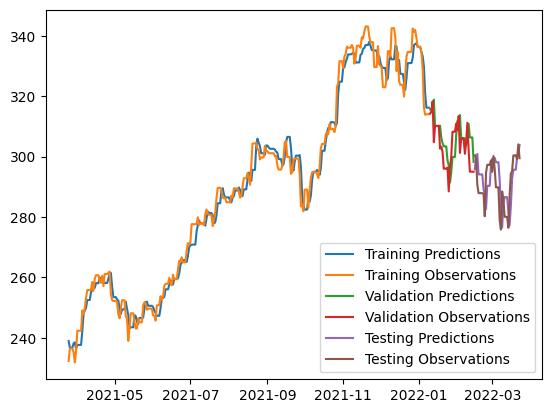

In [ ]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])

In [ ]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 [==============================] - 0s 20ms/step


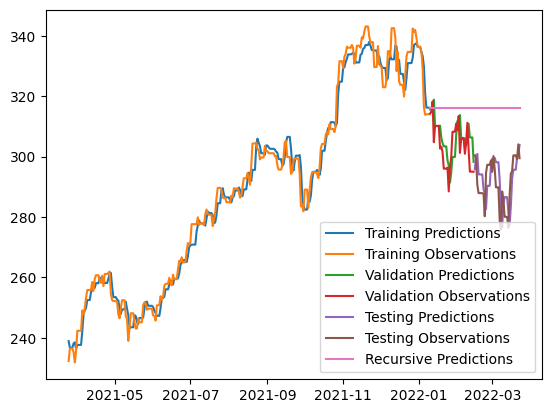

In [ ]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations',
            'Recursive Predictions'])

###References:


https://www.analyticsvidhya.com/blog/2021/10/a-comprehensive-guide-to-time-series-analysis/

https://www.datacamp.com/tutorial/tutorial-time-series-forecasting

https://analyticsindiamag.com/complete-guide-to-dickey-fuller-test-in-time-series-analysis/

https://www.analyticsvidhya.com/blog/2021/06/statistical-tests-to-check-stationarity-in-time-series-part-1/


###License:

MIT License Copyright (c) 2024 Anusree Myneni

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE





